In [1]:
import numpy as np
import pandas as pd
import networkx as nx 
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import pickle
import json
from pathlib import Path
from tqdm import tqdm
from joblib import Parallel, delayed, dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
%cd ..
import _utilities
%cd -

c:\Users\pmcesky\Box\Research\PLR\Data\2019_Cell_Reports\4DCell
c:\Users\pmcesky\Box\Research\PLR\Data\2019_Cell_Reports\4DCell\random_forest


In [2]:
with open( '../cells_of_interest.json', 'r') as f:
   cells_of_interest = json.load(f)

In [3]:
with open('../cells_info.pickle', 'rb') as f:
    cells_info = pickle.load(f)
# cells_info['ABal']
with open('../embryo_cells_info.pickle', 'rb') as f:
    embryo_cells_info = pickle.load(f)
# embryo_cells_info['WT-EMB12']['ABal']

In [4]:
embryos_for_test = ['WT-EMB05','WT-EMB12','WT-EMB19','WT-EMB26']
embryos_for_cross_validation = [embryo_name for embryo_name in embryo_cells_info if embryo_name not in embryos_for_test]

In [5]:
print(embryos_for_cross_validation)

['WT-EMB01', 'WT-EMB02', 'WT-EMB03', 'WT-EMB04', 'WT-EMB06', 'WT-EMB07', 'WT-EMB08', 'WT-EMB09', 'WT-EMB10', 'WT-EMB11', 'WT-EMB13', 'WT-EMB14', 'WT-EMB15', 'WT-EMB16', 'WT-EMB17', 'WT-EMB18', 'WT-EMB20', 'WT-EMB21', 'WT-EMB22', 'WT-EMB23', 'WT-EMB24', 'WT-EMB25', 'WT-EMB27', 'WT-EMB28']


In [6]:
len(embryos_for_cross_validation)

24

# 1. Random Forest with all features 

## Cross-Validation results

In [ ]:
# changing n_estimators in the forest
rf_cv_score = []
for i in tqdm(range(6)): # 6-fold cross-validation
    # train and val dataset
    embryos_val = embryos_for_cross_validation[4*i:4*i+4]
    embryos_train = [embryo_name for embryo_name in embryos_for_cross_validation if embryo_name not in embryos_val]
    X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_train, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
    X_val, _, y_val = _utilities.prepare_data_for_model(embryo_cells_info, embryos_val, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
    X_train, y_train = shuffle(X_train, y_train, random_state=1)
    # X_val, y_val = shuffle(X_val, y_val, random_state=1)
    scores = []
    for n_trees in range(10, 201):
        forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
        forest.fit(X_train, y_train)
        scores.append(forest.score(X_val, y_val))
    rf_cv_score.append(scores.copy())

In [10]:
with open( './cross_validation/rf_cv_score_all_features.json', 'w') as f:
   json.dump(rf_cv_score, f)

In [8]:
with open( './cross_validation/rf_cv_score_all_features.json', 'r') as f:
   rf_cv_score = json.load(f)

In [9]:
np.array(rf_cv_score).shape

(6, 191)

In [10]:
-np.sort(-np.mean(rf_cv_score, axis=0))

array([0.92065868, 0.92053393, 0.92053393, 0.92040918, 0.92028443,
       0.91991018, 0.91991018, 0.91978543, 0.91978543, 0.91978543,
       0.91978543, 0.91978543, 0.91978543, 0.91966068, 0.91966068,
       0.91966068, 0.91966068, 0.91953593, 0.91953593, 0.91953593,
       0.91953593, 0.91941118, 0.91941118, 0.91941118, 0.91941118,
       0.91928643, 0.91928643, 0.91928643, 0.91928643, 0.91928643,
       0.91916168, 0.91916168, 0.91916168, 0.91916168, 0.91903693,
       0.91903693, 0.91903693, 0.91903693, 0.91891218, 0.91891218,
       0.91891218, 0.91891218, 0.91878743, 0.91878743, 0.91878743,
       0.91866267, 0.91866267, 0.91853792, 0.91853792, 0.91841317,
       0.91828842, 0.91816367, 0.91803892, 0.91803892, 0.91791417,
       0.91791417, 0.91778942, 0.91778942, 0.91766467, 0.91766467,
       0.91766467, 0.91753992, 0.91753992, 0.91753992, 0.91741517,
       0.91741517, 0.91741517, 0.91741517, 0.91729042, 0.91729042,
       0.91729042, 0.91729042, 0.91729042, 0.91729042, 0.91716

In [11]:
np.argsort(-np.mean(rf_cv_score, axis=0))+10 # n_trees

array([194, 191, 193, 195, 192, 174, 197, 199, 196, 198, 168, 181, 189,
       190, 188, 180, 182, 172, 187, 175, 176, 178, 170, 167, 169, 171,
       177, 166, 184, 156, 158, 200, 183, 173, 163, 157, 161, 159, 164,
       185, 162, 179, 165, 153, 155, 160, 186, 152, 151, 154, 149, 147,
       150, 146, 104, 139, 148, 138, 145, 130, 137, 142, 123, 144,  58,
        98, 136,  99, 114, 108, 107, 103, 120, 141, 106, 134, 102, 128,
        97, 105, 143, 100,  78, 124, 133, 132, 140, 121, 122, 125, 129,
       118, 135, 117,  96, 126,  80,  92, 111, 112, 116, 119, 131, 127,
        95,  79, 115, 101,  68,  90, 110, 109,  94, 113,  59,  57,  91,
        48,  69,  81,  93,  49,  56,  85,  88,  77,  76,  84,  86,  55,
        51,  70,  67,  53,  83,  82,  60,  74,  87,  89,  61,  66,  54,
        65,  73,  75,  64,  52,  71,  72,  50,  46,  62,  47,  63,  44,
        43,  42,  45,  41,  39,  38,  40,  37,  36,  32,  34,  35,  33,
        30,  31,  28,  27,  29,  26,  25,  23,  24,  22,  21,  1

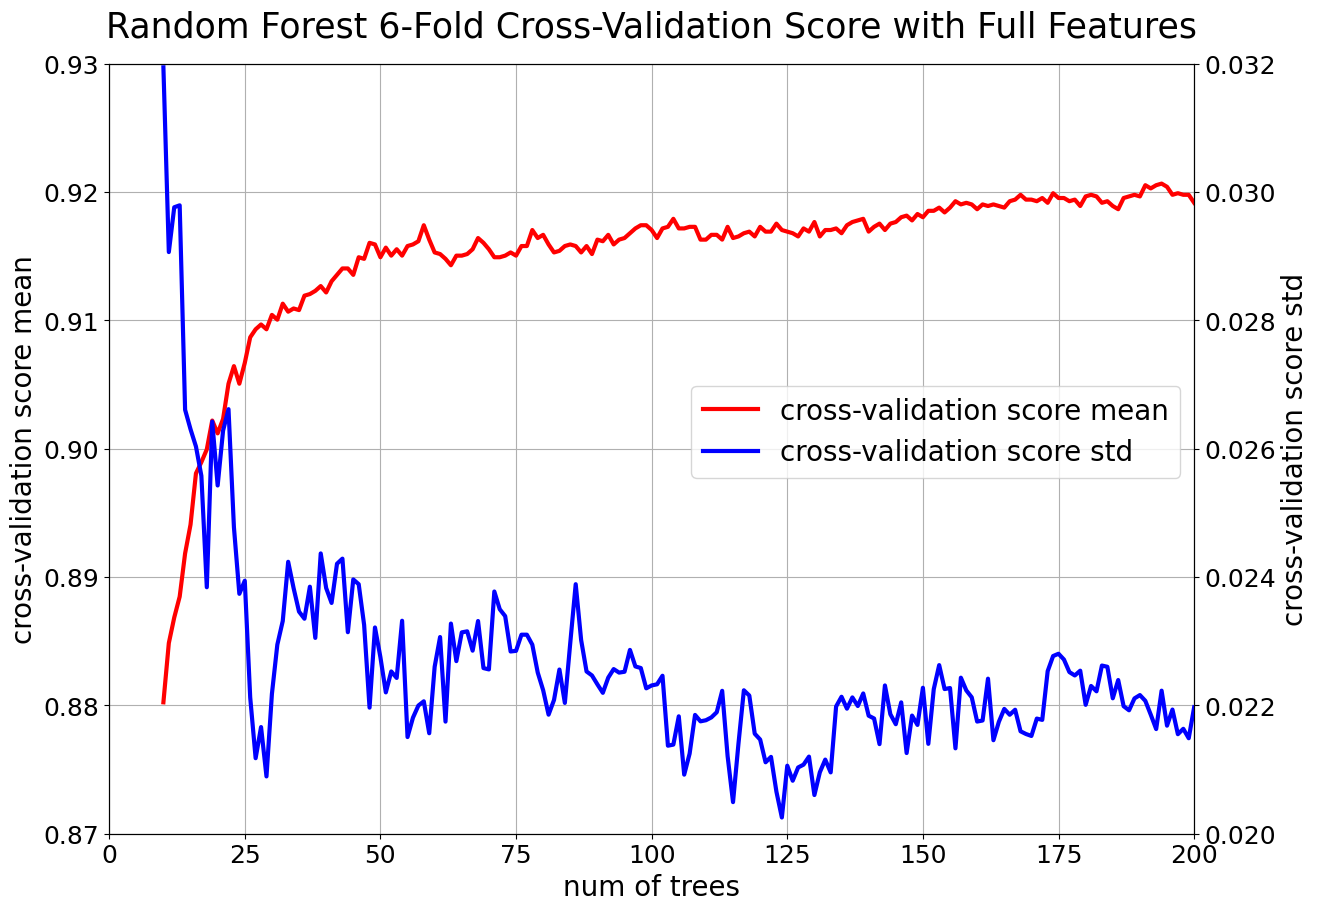

In [12]:
# plot num_trees vs cross_validation score mean and std
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.plot(range(10,201),np.mean(rf_cv_score, axis=0), label = 'cross-validation score mean', color = 'r', linewidth = 3)
ax2 = ax1.twinx()
ax2.plot(range(10,201),np.std(rf_cv_score, axis=0), label = 'cross-validation score std', color = 'b', linewidth = 3)
ax1.grid()
ax1.set_xlim(0,200)
ax1.set_ylim(0.87, 0.93)
ax2.set_ylim(0.020, 0.032)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('num of trees', fontsize = 20)
ax1.set_ylabel('cross-validation score mean', fontsize = 20)
ax2.set_ylabel('cross-validation score std', fontsize = 20)
fig.legend(loc="upper right", bbox_to_anchor=(1,0.6), bbox_transform=ax1.transAxes, fontsize = 20)
ax1.set_title('Random Forest 6-Fold Cross-Validation Score with Full Features', fontsize = 25, y = 1.025)
fig.savefig('./cross_validation/random_forest_full_features_6_fold_cv_score.png')

## Test results on 4 test samples

In [7]:
n_trees = 194 # as our best model    
rf_test_score = []

# use all embryos_for_cross_validation data to retrain the model and test on the test embryo samples
X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_cross_validation, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_test, _, y_test = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_test, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_train, y_train = shuffle(X_train, y_train, random_state=1)
forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
forest.fit(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)
print(f'Random Forest with full features, n_trees = {n_trees} accuracy on test embryos:', test_accuracy)

Random Forest with full features, n_trees = 194 accuracy on test embryos: 0.9318862275449101


## Feature importance

In [8]:
np.argsort(-forest.feature_importances_)

array([202,   1,   5,   2,   9,  13,   6,  17,  10,  21,  25,  14,  33,
        29,  49,  45,  18,  37,  41,  53,  22, 203,  82,  74,  65,  73,
        61,  78,  57,  70,  69,  85,  26,  30,  86,  50,  90,  98,  38,
        81,  93,  42,  89,  34, 105,  62,  66, 101, 102,  94,  58,  54,
        97, 109,  46,  77, 106, 110, 113, 117, 121, 114, 201, 118, 125,
       129, 122, 133, 126, 130, 137,  44,  12,  36,  40, 200, 134,   8,
       145,   0, 206,  24, 209,  48,  16,  52, 141,  68,   4,  32,  28,
        56,  20,  64, 205,  60, 138, 149,  72, 142,  84,  88, 108,  80,
       112,  76, 208, 146, 111, 116, 153,  92, 104, 119,  96, 107, 150,
       115, 103,  75, 132, 100, 136,   7, 120,  67, 123,  83,  71, 124,
        99, 131,  95,  79,  51,  91, 154,  87,  63, 128,   3,  15,  27,
        55, 144,  11, 147,  39,  23, 157, 139, 135,  19,  59, 152, 140,
       155,  31,  47, 148,  43,  35, 127, 143, 151, 158, 204, 156, 159,
       210, 161, 207, 162, 160, 163, 166, 165, 167, 164, 169, 17

From the feature importance above:
1. **'division_orientation_to_mother_cell' along X axis (A/P axis) (202)** is the most important feature. 
   - this is reasonable. As most cells are born in A/P division cases, and this can distinguish their name suffix to be 'a' or 'p'. <br/>
2. The next important features are some **trajectory (0-199)**
3. then is **'division_orientation_to_mother_cell' along Y axis (L/R axis) (203)**
4. then is **lifespan (201)**
5. then is **start_time (200)**. 
6. Then comes **'division_orientation_of_daughter_cells (206, 209)'**, the two daughter cells' division orientations along y axis (L/R axis).

### Feature importance plot

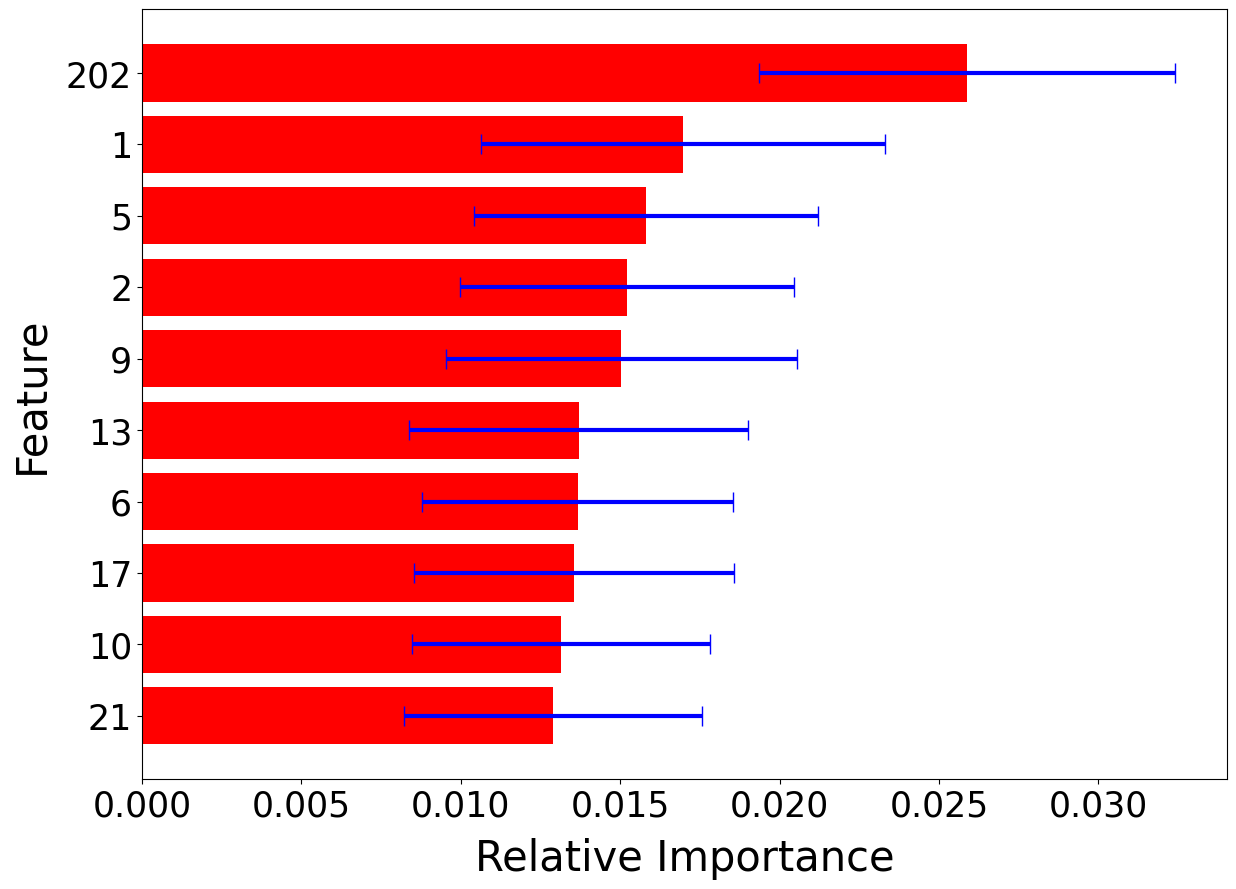

In [9]:
####### Feature importance based on mean decrease in impurity
features = [i for i in range(211)]
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)

# customized number 
num_features = 10 

fig, ax = plt.subplots(figsize=(14,10))
# only plot the customized number of features
ax.barh(range(num_features), importances[indices[-num_features:]],xerr=std[indices[-num_features:]], capsize=7, color='r', ecolor='b', error_kw={'linewidth':3}, align='center')
ax.set_yticks(range(num_features), [features[i] for i in indices[-num_features:]])
ax.set_xlabel('Relative Importance', fontsize=30, labelpad=10)
ax.set_ylabel('Feature', fontsize=30, labelpad=10)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
fig.savefig('./random_forest_feature_importance.png')

Top-10 features in decrease order are [202, 1, 5, 2, 9, 13, 6, 17, 10, 21], 
in features names 'Traj' (trajectory), 'SF' (start_frame), 'LF' (lifespan), 'DM' (division orientation to mother cell), 'DD' (division orientation of two daughter cells), 
we can name top-10 features as: <br/>
['DM_x', 'Traj_x0', 'Traj_x1', 'Traj_y0', 'Traj_x2', 'Traj_x3', 'Traj_y1', 'Traj_x4', 'Traj_y2', 'Traj_x5'], <br/>
[202, $~~~~~~~~~~~$ 1, $~~~~~~~~~~$ 5, $~~~~~~~~$ 2, $~~~~~~~~$ 9, $~~~~~~~~$ 13, $~~~~~~~~$ 6, $~~~~~~~$ 17, $~~~~~~~$ 10, $~~~~~~~$ 21] 

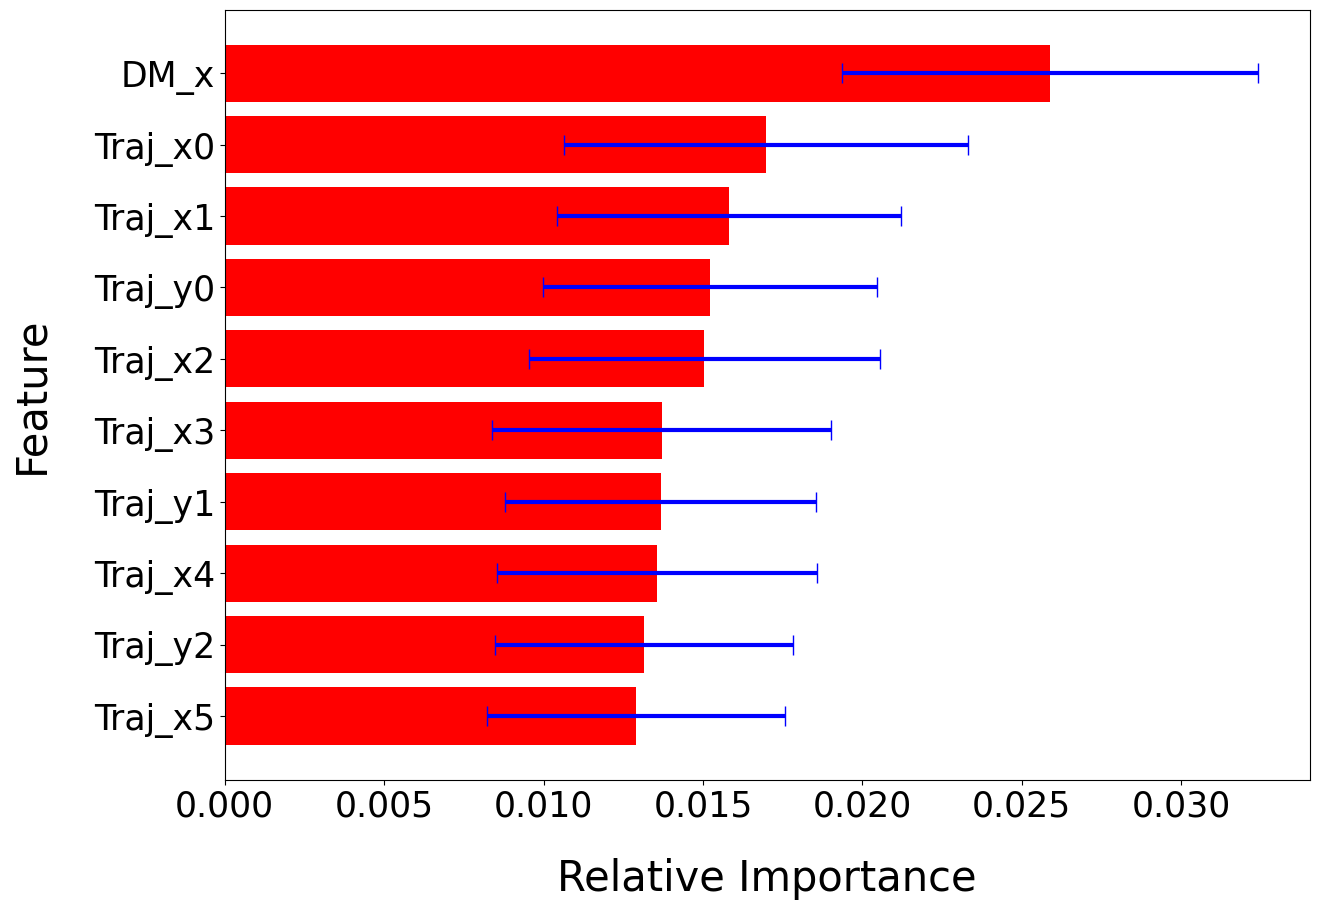

In [10]:
####### Feature importance based on mean decrease in impurity, named with feature names rather than numbers
features = [i for i in range(211)]
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)

# customized number 
num_features = 10 

fig, ax = plt.subplots(figsize=(14,10))
# only plot the customized number of features
ax.barh(range(num_features), importances[indices[-num_features:]],xerr=std[indices[-num_features:]], capsize=7, color='r', ecolor='b', error_kw={'linewidth':3}, align='center')
# ax.set_yticks(range(num_features), [features[i] for i in indices[-num_features:]])
ax.set_yticks(range(num_features), ['DM_x', 'Traj_x0', 'Traj_x1', 'Traj_y0', 'Traj_x2', 'Traj_x3', 'Traj_y1', 'Traj_x4', 'Traj_y2', 'Traj_x5'][::-1])
ax.set_xlabel('Relative Importance', fontsize=30, labelpad=25)
ax.set_ylabel('Feature', fontsize=30, labelpad=30)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)

pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0 + 0.05, pos1.y0+0.04,  pos1.width, pos1.height] # adjust ax position inside figure
ax.set_position(pos2) # set a new position
fig.savefig('./random_forest_feature_importance_with_feature_names.png', dpi=300, bbox_inches='tight') # high resolution with dp=300 and remove white space around figure

In [8]:
######### Feature importance based on feature permutation, this takes too long time here (> several hours) and we did not use this.
from sklearn.inspection import permutation_importance

features = [i for i in range(211)]
result = permutation_importance(forest, X_test, y_test, n_repeats=5, random_state=1, n_jobs=10)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)

# customized number 
num_features = 10 

fig, ax = plt.subplots(figsize=(14,10))
# only plot the customized number of features
ax.barh(range(num_features), importances[indices[-num_features:]],xerr=std[indices[-num_features:]], capsize=5, color='r', ecolor='b', align='center')
ax.set_yticks(range(num_features), [features[i] for i in indices[-num_features:]])
ax.set_xlabel('Permutation Importance', fontsize=20, labelpad=10)
ax.set_ylabel('Feature', fontsize=20, labelpad=10)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
fig.savefig('./random_forest_feature_permutation_importance.png')

PicklingError: Could not pickle the task to send it to the workers.

# 2. Random Forest with only Trajectory features

## Cross-Validation results

In [15]:
with open( './cross_validation/rf_cv_score_trajectory.json', 'r') as f:
   rf_cv_score = json.load(f)

In [16]:
-np.sort(-np.mean(rf_cv_score, axis=0))

array([0.88498004, 0.88485529, 0.88460579, 0.88448104, 0.88448104,
       0.88435629, 0.88423154, 0.88410679, 0.88410679, 0.88410679,
       0.88410679, 0.88410679, 0.88410679, 0.88398204, 0.88398204,
       0.88398204, 0.88398204, 0.88398204, 0.88398204, 0.88385729,
       0.88385729, 0.88385729, 0.88385729, 0.88373253, 0.88373253,
       0.88373253, 0.88360778, 0.88360778, 0.88360778, 0.88360778,
       0.88360778, 0.88360778, 0.88335828, 0.88335828, 0.88335828,
       0.88323353, 0.88323353, 0.88310878, 0.88310878, 0.88298403,
       0.88298403, 0.88298403, 0.88298403, 0.88285928, 0.88260978,
       0.88260978, 0.88260978, 0.88248503, 0.88248503, 0.88248503,
       0.88248503, 0.88248503, 0.88248503, 0.88236028, 0.88223553,
       0.88223553, 0.88223553, 0.88223553, 0.88223553, 0.88223553,
       0.88211078, 0.88211078, 0.88211078, 0.88198603, 0.88198603,
       0.88198603, 0.88198603, 0.88198603, 0.88198603, 0.88186128,
       0.88186128, 0.88186128, 0.88186128, 0.88186128, 0.88186

In [17]:
np.argsort(-np.mean(rf_cv_score, axis=0))+10 # n_trees

array([197, 199, 194, 200, 198, 166, 177, 168, 164, 163, 171, 172, 195,
       190, 192, 193, 188, 169, 175, 189, 174, 170, 176, 165, 186, 196,
       187, 167, 162, 173, 179, 191, 178, 161, 180, 183, 185, 182, 184,
       135, 181, 160, 159, 158, 157, 134, 147, 127, 148, 153, 156, 155,
       146, 119, 117, 126, 133, 149, 136, 154, 139, 124, 116, 123, 150,
       151, 101, 138, 143, 125, 141, 121, 118, 145, 152, 105, 107, 140,
       142, 122, 137, 108, 120, 111, 110, 128, 131, 115, 114, 132, 106,
       129, 130, 112,  97,  98,  99, 100,  96, 109,  94, 144,  92, 113,
        93,  95, 104, 102,  77,  85, 103,  79,  78,  74,  87,  66,  75,
        80,  90,  67,  91,  86,  76,  84,  89,  81,  73,  83,  88,  72,
        82,  69,  68,  62,  70,  61,  60,  65,  63,  71,  64,  59,  53,
        50,  51,  55,  54,  57,  56,  52,  58,  45,  48,  49,  46,  44,
        42,  47,  43,  39,  36,  41,  37,  38,  35,  34,  40,  33,  32,
        31,  27,  30,  29,  28,  26,  25,  22,  24,  21,  23,  1

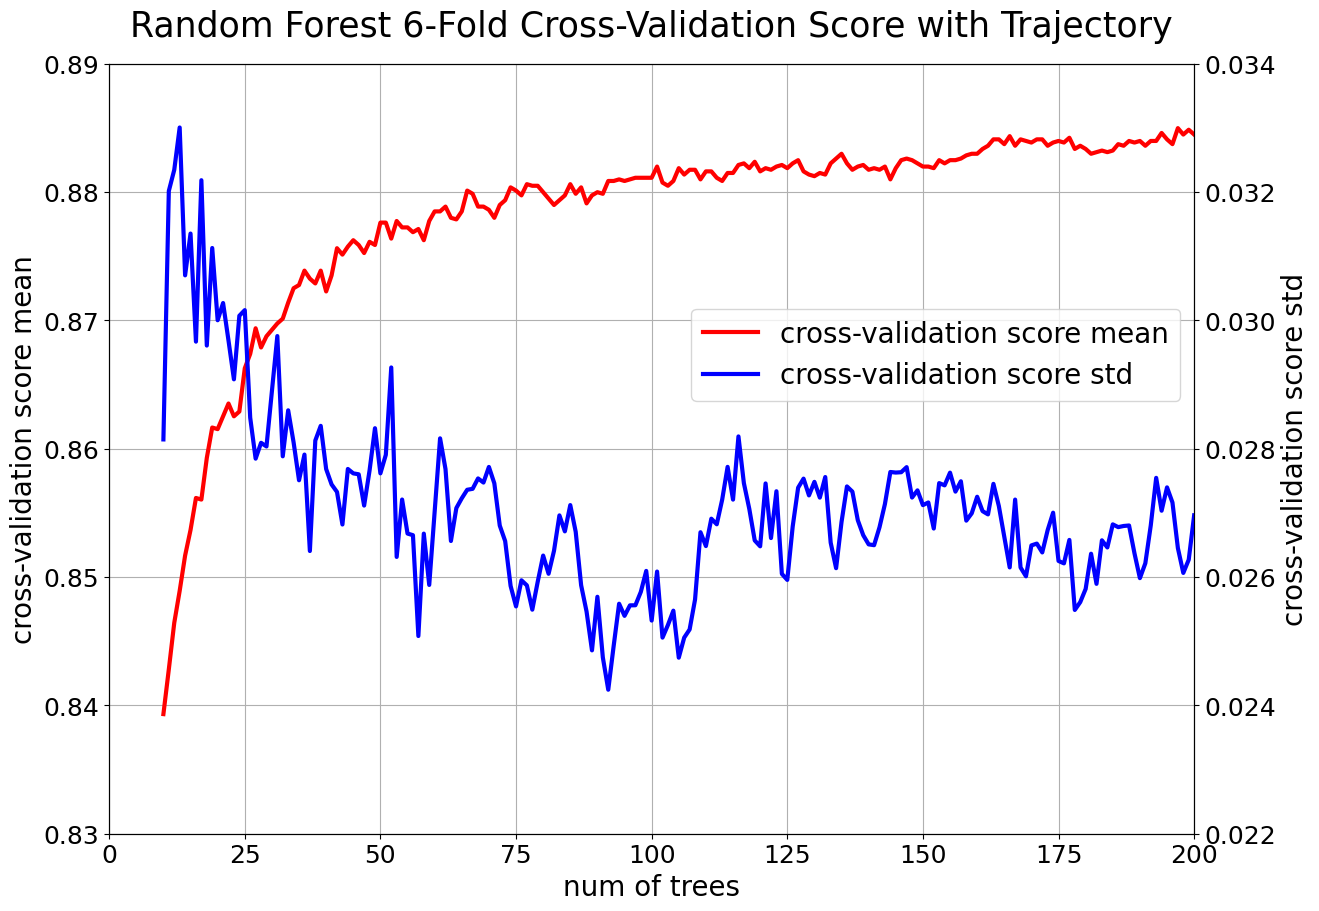

In [18]:
# plot num_trees vs cross_validation score mean and std
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.plot(range(10,201),np.mean(rf_cv_score, axis=0), label = 'cross-validation score mean', color = 'r', linewidth = 3)
ax2 = ax1.twinx()
ax2.plot(range(10,201),np.std(rf_cv_score, axis=0), label = 'cross-validation score std', color = 'b', linewidth = 3)
ax1.grid()
ax1.set_xlim(0,200)
ax1.set_ylim(0.83, 0.89)
ax2.set_ylim(0.022, 0.034)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('num of trees', fontsize = 20)
ax1.set_ylabel('cross-validation score mean', fontsize = 20)
ax2.set_ylabel('cross-validation score std', fontsize = 20)
fig.legend(loc="upper right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes, fontsize = 20)
ax1.set_title('Random Forest 6-Fold Cross-Validation Score with Trajectory', fontsize = 25, y = 1.025)
fig.savefig('./cross_validation/random_forest_trajectory_6_fold_cv_score.png')

## on 4 test samples

In [19]:
n_trees = 197 # as our best model    
rf_test_score = []

# use all embryos_for_cross_validation data to retrain the model and test on the test embryo samples
X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_cross_validation, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_test, _, y_test = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_test, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
# use only trajectory features
X_train = np.array(X_train)[:,:200] 
X_test = np.array(X_test)[:,:200]
X_train, y_train = shuffle(X_train, y_train, random_state=1)
forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
forest.fit(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)
print(f'Random Forest with trajectory features, n_trees = {n_trees} accuracy on test embryos:', test_accuracy)

Random Forest with trajectory features, n_trees = 197 accuracy on test embryos: 0.8967065868263473


In [20]:
np.argsort(-forest.feature_importances_)

array([  1,   5,   2,   9,  13,   6,  10,  17,  21,  14,  25,  29,  33,
        18,  37,  22,  41,  45,  53,  49,  74,  73,  70,  30,  57,  61,
        78,  94,  65,  26,  82,  69,  93,  66,  81,  77,  85,  34,  38,
        42, 102,  86, 106,  62,  89,  50,  98, 101,  90,  58, 113,  54,
       109, 105,  46,  97, 114, 117, 110, 118, 121, 125, 129, 122, 126,
       133, 130, 137,  48,  44,  12,  20,  32,   4, 145,   0,  28,  36,
       134,  56, 141,  24,   8,  16,  40,  72,  64, 149,  68,  60,  52,
       138, 111,  76,  80, 146, 142, 153, 150, 108, 119,  84, 112, 107,
        88, 116, 115,  92, 103, 104,  91,  96,  75,  79, 120,  99,  95,
         7, 135, 131,  87,  71,  83, 123,  63, 100,   3,  11,  67, 128,
       148, 132,  15, 152, 147,  59, 127,  31,  27,  43, 154,  35,  55,
       157, 136,  23,  19, 124,  47, 139,  39,  51, 144, 151, 140, 143,
       155, 158, 156, 159, 161, 162, 163, 160, 165, 166, 169, 164, 167,
       171, 170, 168, 173, 174, 175, 172, 179, 178, 176, 183, 18

# 3. Random Forest with Trajectory and start_frame features

## Cross-Validation results

In [21]:
with open( './cross_validation/rf_cv_score_trajectory_and_start_frame.json', 'r') as f:
   rf_cv_score = json.load(f)

In [22]:
-np.sort(-np.mean(rf_cv_score, axis=0))

array([0.8866018 , 0.88622754, 0.88610279, 0.88597804, 0.88585329,
       0.88572854, 0.88560379, 0.88547904, 0.88547904, 0.88547904,
       0.88547904, 0.88535429, 0.88535429, 0.88522954, 0.88522954,
       0.88522954, 0.88522954, 0.88510479, 0.88510479, 0.88510479,
       0.88510479, 0.88498004, 0.88498004, 0.88498004, 0.88498004,
       0.88498004, 0.88498004, 0.88485529, 0.88485529, 0.88485529,
       0.88485529, 0.88473054, 0.88473054, 0.88473054, 0.88473054,
       0.88473054, 0.88473054, 0.88473054, 0.88473054, 0.88473054,
       0.88473054, 0.88473054, 0.88460579, 0.88460579, 0.88460579,
       0.88460579, 0.88460579, 0.88460579, 0.88448104, 0.88448104,
       0.88448104, 0.88448104, 0.88448104, 0.88448104, 0.88448104,
       0.88448104, 0.88448104, 0.88448104, 0.88448104, 0.88448104,
       0.88448104, 0.88435629, 0.88435629, 0.88435629, 0.88423154,
       0.88423154, 0.88423154, 0.88423154, 0.88423154, 0.88410679,
       0.88410679, 0.88410679, 0.88410679, 0.88410679, 0.88410

In [23]:
np.argsort(-np.mean(rf_cv_score, axis=0))+10 # n_trees

array([124, 128, 126, 131, 125, 122, 127, 130, 129, 121, 138, 142, 135,
       114, 113, 139, 132, 101, 123, 109, 118, 199, 106, 152, 134, 137,
       112, 136, 143, 102, 107, 103, 111, 115, 117, 133, 155, 146, 140,
       116, 200, 108, 119, 141, 171, 193, 150, 105,  96, 147, 144, 159,
       194, 153, 198, 104, 151, 160,  97, 178, 154, 195, 157, 145, 156,
       192, 120, 148, 158, 110, 149, 196, 162, 172, 197, 179, 176,  95,
        93, 189,  77,  88, 175, 191, 100, 173, 184, 188,  99, 168, 180,
       161, 182, 163, 177, 170, 181,  98, 174, 183,  89,  92, 187,  91,
       164, 190,  76,  90, 169, 167,  78, 185, 166, 165,  87,  83,  80,
        81,  94, 186,  85,  82,  84,  79,  86,  74,  73,  75,  71,  72,
        70,  68,  69,  66,  63,  65,  67,  57,  56,  62,  64,  52,  49,
        58,  61,  45,  60,  59,  55,  53,  47,  54,  48,  44,  51,  50,
        37,  43,  42,  46,  41,  40,  39,  35,  38,  34,  36,  33,  32,
        31,  27,  30,  29,  28,  26,  23,  25,  24,  22,  21,  2

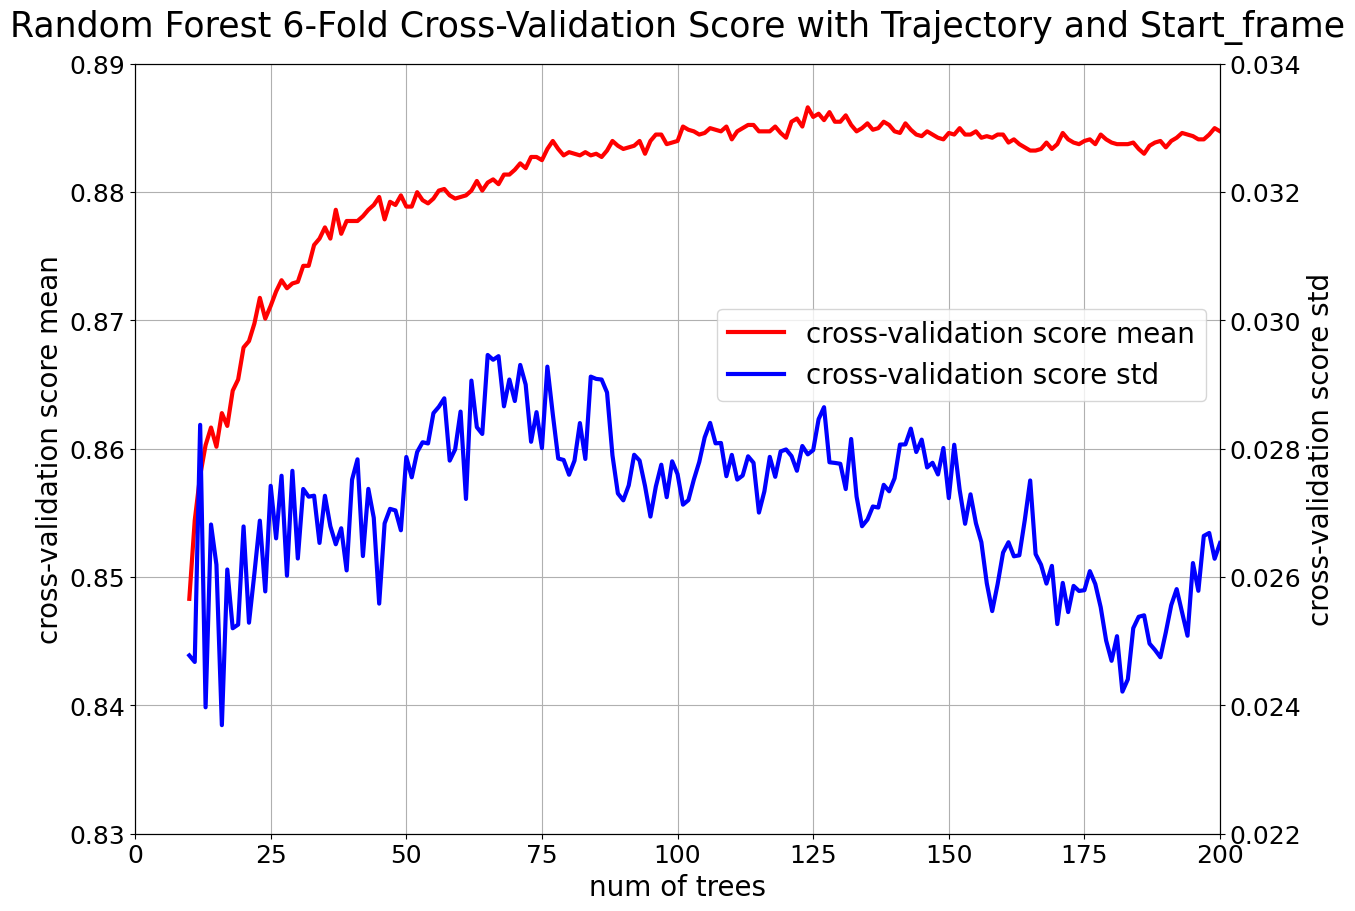

In [24]:
# plot num_trees vs cross_validation score mean and std
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.plot(range(10,201),np.mean(rf_cv_score, axis=0), label = 'cross-validation score mean', color = 'r', linewidth = 3)
ax2 = ax1.twinx()
ax2.plot(range(10,201),np.std(rf_cv_score, axis=0), label = 'cross-validation score std', color = 'b', linewidth = 3)
ax1.grid()
ax1.set_xlim(0,200)
ax1.set_ylim(0.83, 0.89)
ax2.set_ylim(0.022, 0.034)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('num of trees', fontsize = 20)
ax1.set_ylabel('cross-validation score mean', fontsize = 20)
ax2.set_ylabel('cross-validation score std', fontsize = 20)
fig.legend(loc="upper right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes, fontsize = 20)
ax1.set_title('Random Forest 6-Fold Cross-Validation Score with Trajectory and Start_frame', fontsize = 25, y = 1.025)
fig.savefig('./cross_validation/random_forest_trajectory_and_start_frame_6_fold_cv_score.png')

## on 4 test samples

In [25]:
n_trees = 124 # as our best model    
rf_test_score = []

# use all embryos_for_cross_validation data to retrain the model and test on the test embryo samples
X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_cross_validation, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_test, _, y_test = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_test, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
# use trajectory and start_frame features
X_train = np.array(X_train)[:,:201] 
X_test = np.array(X_test)[:,:201]
X_train, y_train = shuffle(X_train, y_train, random_state=1)
forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
forest.fit(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)
print(f'Random Forest with trajectory and start_frame features, n_trees = {n_trees} accuracy on test embryos:', test_accuracy)

Random Forest with trajectory and start_frame features, n_trees = 124 accuracy on test embryos: 0.8922155688622755


In [26]:
np.argsort(-forest.feature_importances_)

array([  1,   5,   2,   6,   9,  17,  13,  21,  10,  14,  18,  25,  33,
        41,  29,  37,  74,  45,  49,  73,  82,  22,  26,  65,  78,  61,
        86,  69,  30,  57,  70,  53,  38,  90,  89,  98,  34, 105,  85,
       109,  42,  66, 106,  46,  50,  93,  94,  54, 101,  77,  62,  81,
        97, 113, 117, 102, 110, 114, 121,  58, 118, 125, 129, 122, 133,
       126, 130, 137,  40,  28,  24, 141, 134,  36,  32,   0,  44, 200,
       145,  20,   8,  12,   4,  16,  48,  60,  52, 149,  56,  68,  64,
       138,  72, 111, 108, 107, 112, 116,  88, 153, 119, 142,  80,  84,
        76, 150, 146, 103,  75, 115,  79, 104,  92, 123,  71,  63,  23,
        83, 135,  87,  99, 120, 154,  95,  31, 131,  47,   3,  67, 132,
       100, 136, 157,   7,  19,  27,  15,  91, 139, 127,  96,  11, 128,
        51,  59,  39,  35,  55, 144,  43, 124, 155, 148, 151, 147, 143,
       140, 152, 158, 156, 159, 161, 162, 165, 163, 160, 166, 169, 167,
       164, 171, 170, 168, 173, 175, 177, 174, 172, 182, 183, 17

# 4. Random Forest with Trajectory, start_frame and lifespan_frame features

## Cross-Validation results

In [27]:
with open( './cross_validation/rf_cv_score_trajectory_and_start_frame_and_lifespan.json', 'r') as f:
   rf_cv_score = json.load(f)

In [28]:
-np.sort(-np.mean(rf_cv_score, axis=0))

array([0.88672655, 0.88672655, 0.88647705, 0.88622754, 0.88622754,
       0.88622754, 0.88610279, 0.88610279, 0.88610279, 0.88597804,
       0.88597804, 0.88597804, 0.88585329, 0.88585329, 0.88585329,
       0.88572854, 0.88572854, 0.88572854, 0.88560379, 0.88560379,
       0.88560379, 0.88560379, 0.88547904, 0.88547904, 0.88547904,
       0.88547904, 0.88547904, 0.88547904, 0.88547904, 0.88547904,
       0.88535429, 0.88535429, 0.88535429, 0.88535429, 0.88535429,
       0.88535429, 0.88535429, 0.88522954, 0.88522954, 0.88522954,
       0.88522954, 0.88522954, 0.88522954, 0.88510479, 0.88510479,
       0.88510479, 0.88510479, 0.88510479, 0.88510479, 0.88510479,
       0.88510479, 0.88510479, 0.88510479, 0.88498004, 0.88498004,
       0.88498004, 0.88498004, 0.88498004, 0.88485529, 0.88485529,
       0.88485529, 0.88485529, 0.88485529, 0.88485529, 0.88485529,
       0.88485529, 0.88473054, 0.88473054, 0.88473054, 0.88473054,
       0.88473054, 0.88473054, 0.88473054, 0.88473054, 0.88473

In [29]:
np.argsort(-np.mean(rf_cv_score, axis=0))+10 # n_trees

array([200, 199, 163, 162, 167, 131, 198, 166, 168, 165, 172, 161, 175,
       176, 197, 164, 174, 170, 196, 160, 110, 171, 177, 193, 113, 111,
       137, 114, 130, 169, 123, 129, 154, 179, 122, 159, 192, 112, 188,
       178, 180, 142, 121, 125, 138, 155, 195, 173, 107, 148, 127, 143,
       158, 157, 186, 182, 109, 132, 124, 184, 136, 134, 189, 128, 187,
       194, 190, 115, 191, 108, 150, 183, 133, 139, 149, 119, 120, 135,
       145, 146, 144, 156, 181, 118, 147, 106, 185, 105, 140, 117, 126,
       153, 141, 116, 104, 151, 152,  99,  70,  80, 103,  79,  97, 102,
       100,  95,  91,  78,  77,  82,  81,  96,  72,  98,  94,  76,  71,
        58,  89,  74,  90,  83, 101,  75,  88,  69,  93,  73,  68,  92,
        55,  59,  62,  84,  87,  60,  66,  67,  86,  85,  63,  61,  65,
        56,  52,  64,  54,  57,  53,  51,  49,  48,  50,  45,  47,  46,
        36,  41,  44,  43,  37,  35,  38,  39,  42,  40,  34,  32,  33,
        31,  27,  30,  26,  29,  28,  25,  22,  24,  23,  21,  2

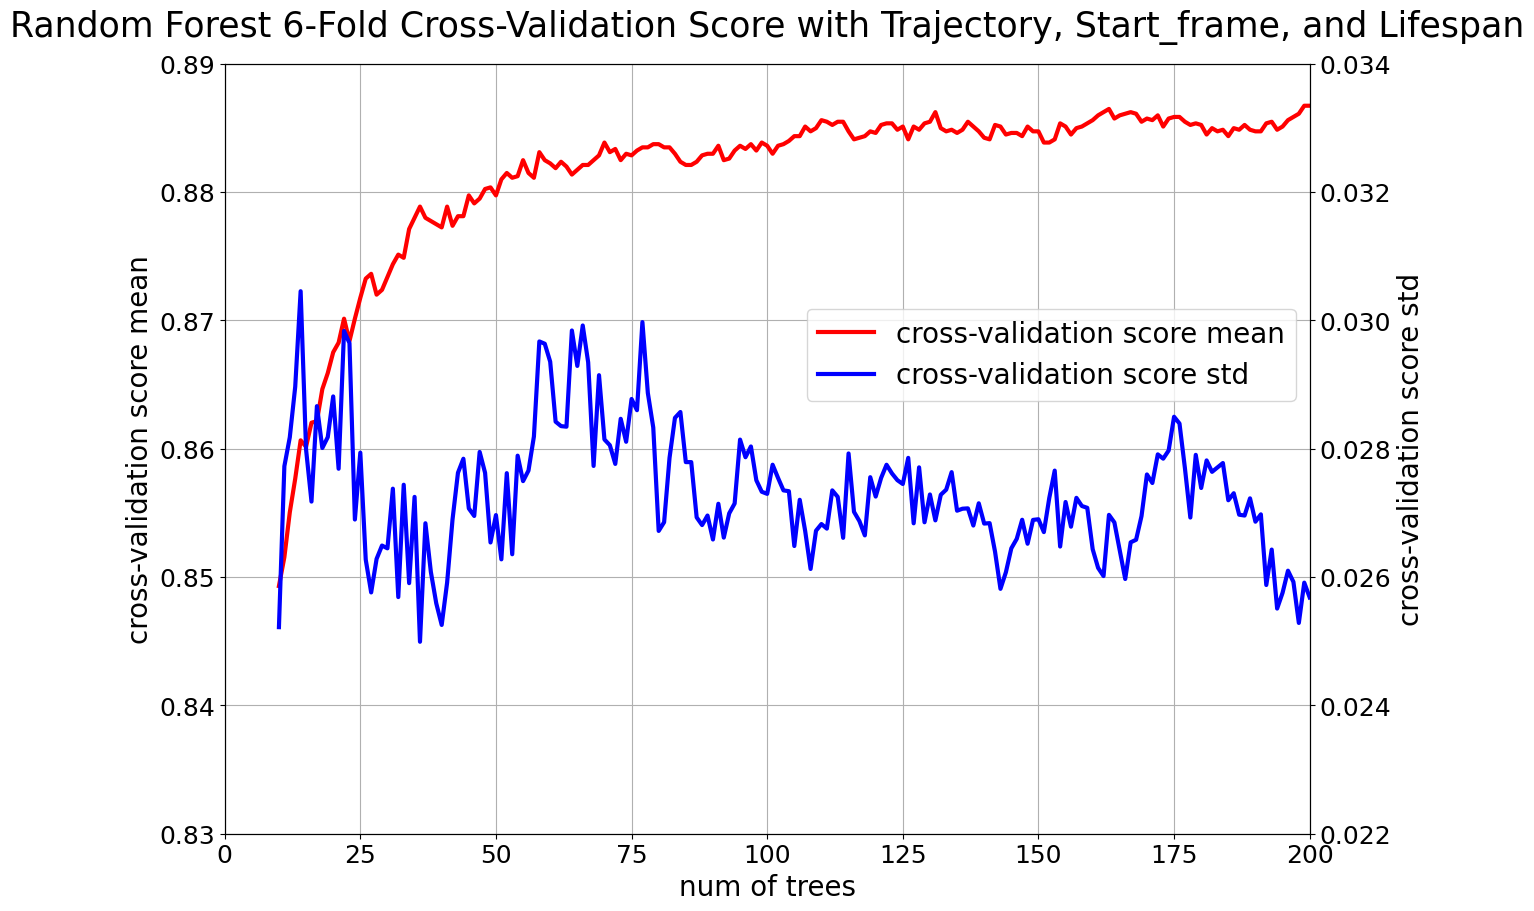

In [30]:
# plot num_trees vs cross_validation score mean and std
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.plot(range(10,201),np.mean(rf_cv_score, axis=0), label = 'cross-validation score mean', color = 'r', linewidth = 3)
ax2 = ax1.twinx()
ax2.plot(range(10,201),np.std(rf_cv_score, axis=0), label = 'cross-validation score std', color = 'b', linewidth = 3)
ax1.grid()
ax1.set_xlim(0,200)
ax1.set_ylim(0.83, 0.89)
ax2.set_ylim(0.022, 0.034)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('num of trees', fontsize = 20)
ax1.set_ylabel('cross-validation score mean', fontsize = 20)
ax2.set_ylabel('cross-validation score std', fontsize = 20)
fig.legend(loc="upper right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes, fontsize = 20)
ax1.set_title('Random Forest 6-Fold Cross-Validation Score with Trajectory, Start_frame, and Lifespan', fontsize = 25, y = 1.025)
fig.savefig('./cross_validation/random_forest_trajectory_and_start_frame_and_lifespan_frame_6_fold_cv_score.png')

## on 4 test samples

In [31]:
n_trees = 200 # as our best model    
rf_test_score = []

# use all embryos_for_cross_validation data to retrain the model and test on the test embryo samples
X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_cross_validation, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_test, _, y_test = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_test, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
# use trajectory, start_frame, and lifespan_frame features
X_train = np.array(X_train)[:,:202] 
X_test = np.array(X_test)[:,:202]
X_train, y_train = shuffle(X_train, y_train, random_state=1)
forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
forest.fit(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)
print(f'Random Forest with trajectory, start_frame and lifespan_frame features, n_trees = {n_trees} accuracy on test embryos:', test_accuracy)

Random Forest with trajectory, start_frame and lifespan_frame features, n_trees = 200 accuracy on test embryos: 0.8937125748502994


In [32]:
np.argsort(-forest.feature_importances_)

array([  5,   1,   2,   9,   6,  17,  13,  21,  10,  25,  29,  14,  41,
        18,  37,  49,  33,  45,  69,  73,  74,  53,  22,  26,  61,  78,
        65,  57,  93,  30,  70,  82, 109,  81,  86,  66,  50,  89,  54,
        77,  90, 102,  97,  94,  34,  46,  38,  85,  62, 105,  42,  98,
       106, 101,  58, 113, 110, 117, 201, 121, 114, 125, 118, 129, 122,
       126, 133, 130, 137,  44,   4, 134,  20,  68,  16,   8,  36, 145,
       200,   0,  32,  40,  28,  48,  56, 141,  24,  60,  12,  72,  52,
        64, 149, 138, 111, 107,  80, 153, 142,  88,  84, 108, 146, 115,
       119, 150, 112,  76, 100,  75, 116, 104,  92,  95,  67, 103, 154,
       131,  87,  91,  71, 123, 120,   3,  83,  79,   7, 132,  99,  19,
       128,  15,  11, 136,  39, 135,  96,  55,  63,  59,  43,  27,  23,
        51,  31,  35, 157, 124, 127,  47, 148, 144, 143, 139, 151, 147,
       152, 155, 140, 158, 159, 156, 161, 162, 160, 165, 163, 167, 169,
       166, 164, 170, 171, 168, 173, 175, 172, 177, 174, 180, 17

# 5. Random Forest with Trajectory, start_frame, lifespan_frame, and division_orientation_to_mother_cell features

## Cross-Validation results

In [33]:
with open( './cross_validation/rf_cv_score_trajectory_and_start_frame_and_lifespan_and_division_orientation_to_mother_cell.json', 'r') as f:
   rf_cv_score = json.load(f)

In [34]:
-np.sort(-np.mean(rf_cv_score, axis=0))

array([0.91816367, 0.91816367, 0.91816367, 0.91816367, 0.91803892,
       0.91791417, 0.91791417, 0.91778942, 0.91766467, 0.91753992,
       0.91753992, 0.91753992, 0.91753992, 0.91753992, 0.91753992,
       0.91741517, 0.91741517, 0.91741517, 0.91741517, 0.91741517,
       0.91741517, 0.91729042, 0.91729042, 0.91729042, 0.91729042,
       0.91716567, 0.91716567, 0.91716567, 0.91716567, 0.91716567,
       0.91716567, 0.91704092, 0.91704092, 0.91704092, 0.91704092,
       0.91704092, 0.91691617, 0.91691617, 0.91691617, 0.91679142,
       0.91679142, 0.91666667, 0.91666667, 0.91666667, 0.91654192,
       0.91654192, 0.91654192, 0.91654192, 0.91641717, 0.91641717,
       0.91641717, 0.91641717, 0.91629242, 0.91629242, 0.91616766,
       0.91616766, 0.91616766, 0.91616766, 0.91604291, 0.91604291,
       0.91604291, 0.91604291, 0.91604291, 0.91604291, 0.91604291,
       0.91591816, 0.91591816, 0.91591816, 0.91591816, 0.91591816,
       0.91591816, 0.91579341, 0.91566866, 0.91566866, 0.91566

In [35]:
np.argsort(-np.mean(rf_cv_score, axis=0))+10 # n_trees

array([169, 200, 176, 182, 198, 167, 170, 180, 196, 181, 183, 168, 192,
       193, 197, 165, 194, 195, 178, 174, 184, 191, 177, 172, 164, 175,
       171, 166, 199, 185, 188, 187, 190, 163, 189, 160, 161, 173, 162,
       179, 154, 149, 144, 159, 147, 155, 186, 151, 156, 157, 142, 150,
       137, 158, 145, 143, 153, 136, 108, 131, 148, 133, 146, 152, 139,
       138, 107, 140, 132, 141, 134, 129, 109, 119, 118, 117, 116, 135,
       127, 110, 130, 128, 121, 105, 104, 120, 115, 126, 124, 111, 106,
       123, 122, 114, 125, 100, 102, 101, 113, 112,  99,  98, 103,  93,
        92,  97,  91,  96,  90,  75,  94,  95,  69,  76,  78,  70,  61,
        62,  77,  60,  73,  71,  64,  80,  74,  68,  65,  72,  79,  59,
        83,  89,  88,  56,  58,  67,  66,  63,  57,  87,  85,  54,  81,
        82,  55,  84,  86,  53,  52,  51,  46,  44,  48,  49,  45,  47,
        50,  43,  41,  42,  40,  37,  39,  32,  34,  33,  38,  29,  36,
        35,  28,  30,  31,  27,  26,  24,  25,  23,  22,  20,  1

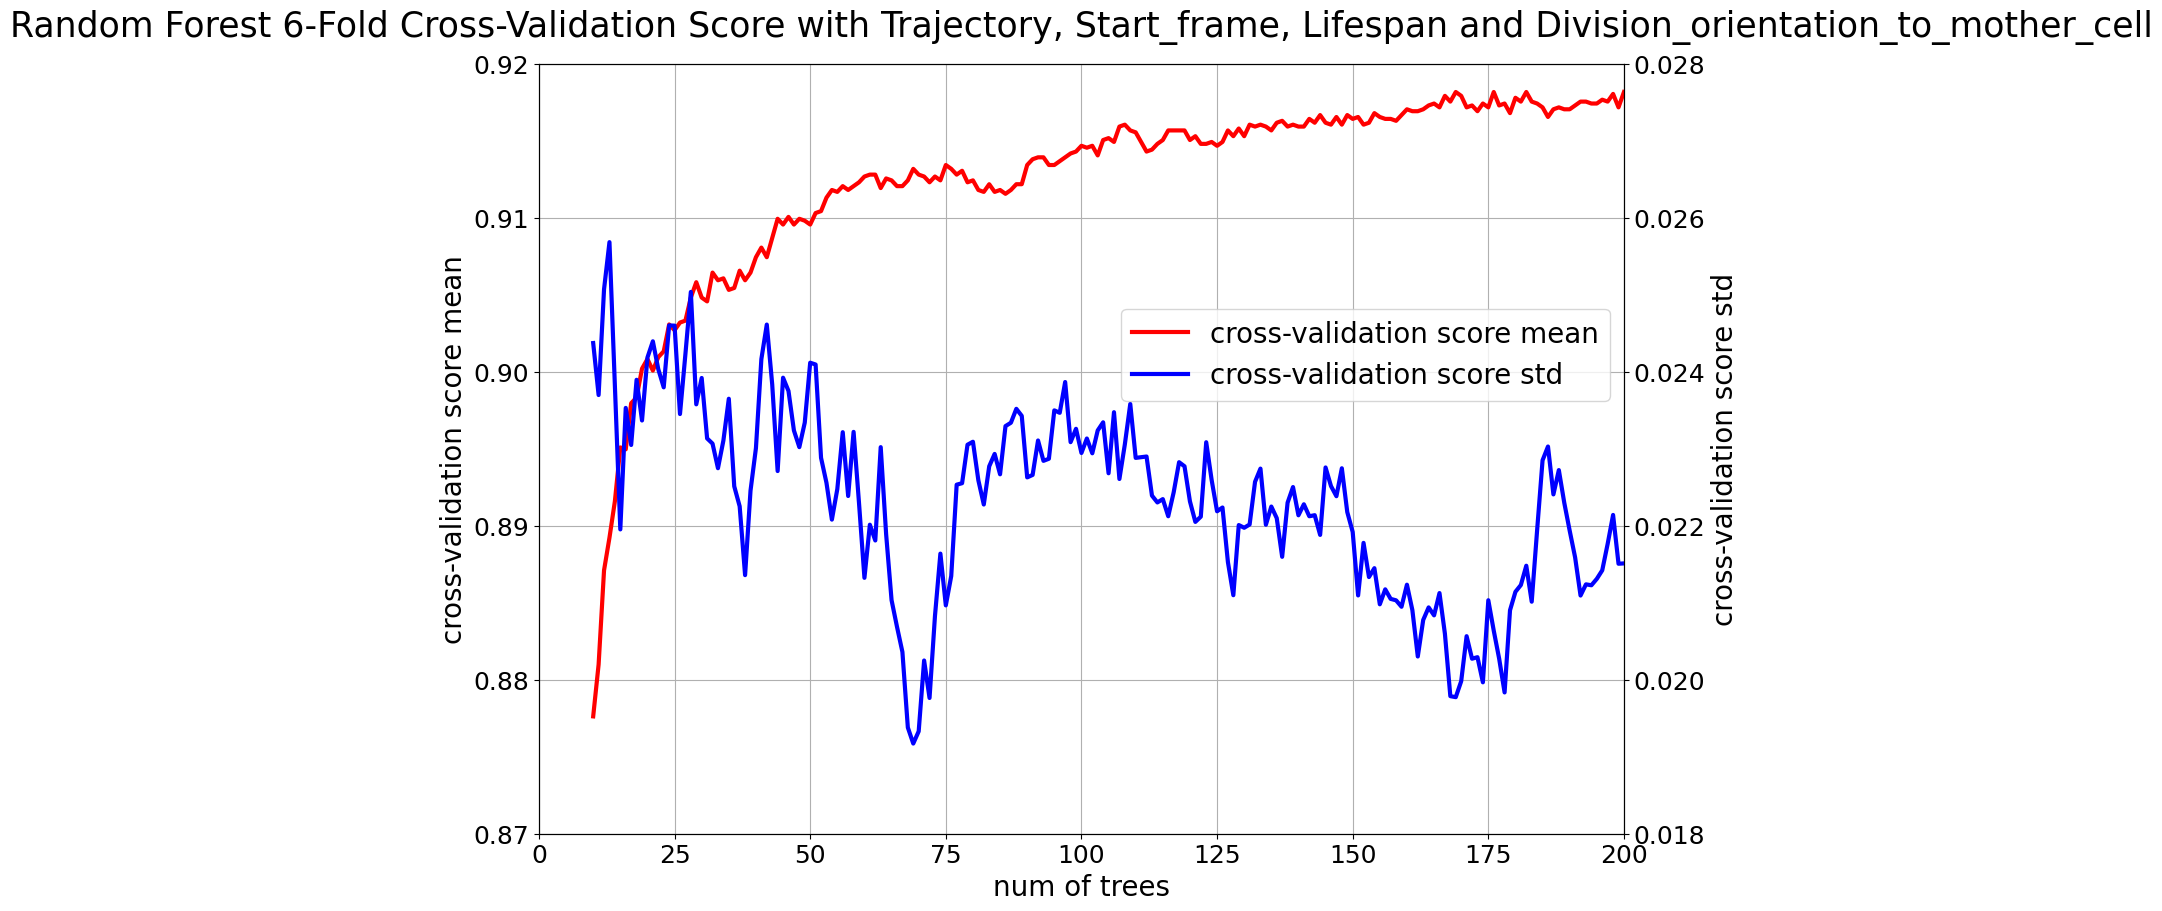

In [36]:
# plot num_trees vs cross_validation score mean and std
fig, ax1 = plt.subplots(figsize = (14,10))
ax1.plot(range(10,201),np.mean(rf_cv_score, axis=0), label = 'cross-validation score mean', color = 'r', linewidth = 3)
ax2 = ax1.twinx()
ax2.plot(range(10,201),np.std(rf_cv_score, axis=0), label = 'cross-validation score std', color = 'b', linewidth = 3)
ax1.grid()
ax1.set_xlim(0,200)
ax1.set_ylim(0.87, 0.92)
ax2.set_ylim(0.018, 0.028)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('num of trees', fontsize = 20)
ax1.set_ylabel('cross-validation score mean', fontsize = 20)
ax2.set_ylabel('cross-validation score std', fontsize = 20)
fig.legend(loc="upper right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes, fontsize = 20)
ax1.set_title('Random Forest 6-Fold Cross-Validation Score with Trajectory, Start_frame, Lifespan and Division_orientation_to_mother_cell', fontsize = 25, y = 1.025)
fig.savefig('./cross_validation/random_forest_trajectory_and_start_frame_and_lifespan_frame_and_division_orientation_to_mother_cell_6_fold_cv_score.png')

## on 4 test samples

In [37]:
n_trees = 169 # as our best model    
rf_test_score = []

# use all embryos_for_cross_validation data to retrain the model and test on the test embryo samples
X_train, _, y_train = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_cross_validation, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
X_test, _, y_test = _utilities.prepare_data_for_model(embryo_cells_info, embryos_for_test, use_frame = True, lifespan_frame_longest = 50, preserve_time_dimension = True, flatten = True)
# use trajectory, start_frame, lifespan_frame, and division_orientation_to_mother_cell features
X_train = np.array(X_train)[:,:205] 
X_test = np.array(X_test)[:,:205]
X_train, y_train = shuffle(X_train, y_train, random_state=1)
forest = RandomForestClassifier(n_estimators=n_trees, random_state=1, n_jobs=10)
forest.fit(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)
print(f'Random Forest with trajectory, start_frame, lifespan_frame, and division_orientation_to_mother_cell features, n_trees = {n_trees} accuracy on test embryos:', test_accuracy)

Random Forest with trajectory, start_frame, lifespan_frame, and division_orientation_to_mother_cell features, n_trees = 169 accuracy on test embryos: 0.9258982035928144


In [38]:
np.argsort(-forest.feature_importances_)

array([202,   1,   5,   9,   2,   6,  13,  17,  10,  14,  21,  25,  29,
       203,  33,  41,  37,  45,  53,  18,  49,  22,  78,  74,  73,  61,
        57,  26,  65,  30,  66, 101,  94,  54,  69,  93,  86,  85,  82,
        89,  70,  62, 102,  81,  77,  34,  46,  98, 117, 105,  50, 106,
        90,  42,  38, 121, 109,  58, 113, 114,  97, 110, 201, 125, 129,
       118, 122, 126, 133, 130, 137, 200, 134,  12,  16,  36,  48,  28,
        40,  44,   0, 141,  20,  24,   8, 145,  32,  52,  72,  56,   4,
       138,  64,  68, 149,  60,  76,  88, 146, 111, 153, 115,  84, 108,
       142,  92, 116,  80, 104, 119, 120, 107, 123, 112, 150, 132, 103,
       100, 128,  87,  67, 135,  79,  75,  83, 136,   7,  95,  96,  91,
        11,  99, 131,  63,  31,  71, 124, 147,  59,  35,  47, 157,  15,
        23, 152,  19,   3,  39,  51, 144, 139, 154, 127, 143,  43, 151,
       140,  55, 148,  27, 155, 158, 204, 156, 159, 161, 162, 160, 163,
       165, 166, 169, 164, 167, 171, 170, 168, 173, 174, 172, 17

We can see a big score improvement on test samples, if add 'division_orientation_to_mother_cell, from $0.894$ to $0.926$, not far away from score of full feature random forest $0.932$.

And from the feature importance of random forest using trajectory, start_frame, lifespan_frame, and division_orientation_to_mother_cell features:
1. **'division_orientation_to_mother_cell' along X axis (A/P axis) (202)** is the most important feature. 
   - this is reasonable. As most cells are born in A/P division cases, and this can distinguish their name suffix to be 'a' or 'p'. <br/>
2. The next important features are some **trajectory (0-199)**, 
3. Then is **'division_orientation_to_mother_cell' along Y axis (L/R axis) (203)**
4. then is **lifespan (201)**
5. then is **start_time (200)**. 
6. Then is **'division_orientation_to_mother_cell' along Z axis (D/V axis) (204)**